In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)
os.getcwd()

'/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library'

## Loading the network

In [2]:
from sclibrary import dataset_loader, SCPlot

# list all the datasets
dataset_loader.list_transportation_datasets()

['Barcelona',
 'austin',
 'Braess-Example',
 'chicago-regional',
 'SiouxFalls',
 'Berlin-Tiergarten',
 '.DS_Store',
 'anaheim',
 'Berlin-Friedrichshain',
 'Sydney',
 'Berlin-Mitte-Prenzlauerberg-Friedrichshain-Center',
 'Eastern-Massachusetts',
 'Winnipeg-Asymmetric',
 'Berlin-Mitte-Center',
 'Berlin-Center',
 'SymmetricaTestCase',
 'GoldCoast',
 'Birmingham-England',
 'Philadelphia',
 'Winnipeg',
 'chicago-sketch',
 'Munich',
 'Terrassa-Asymmetric',
 'Hessen-Asymmetric',
 'Berlin-Prenzlauerberg-Center']

In [3]:

import matplotlib.pyplot as plt


dataset = "chicago-sketch"
sc, coordinates, flow = dataset_loader.load(dataset=dataset)

scplot = SCPlot(simplical_complex=sc, coordinates=coordinates)

{'number_of_zones': '387', 'number_of_nodes': '933', 'first_thru_node': '1', 'number_of_links': '2950', 'features': array(['tail node', 'head node', 'capacity (veh/h)', 'length (miles)',
       'fftt(min)', 'B', 'Power', 'speed limit (mph)', 'toll (cents)',
       'link type', nan], dtype=object), 'coordinates_exist': True, 'flow_data_exist': True}


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


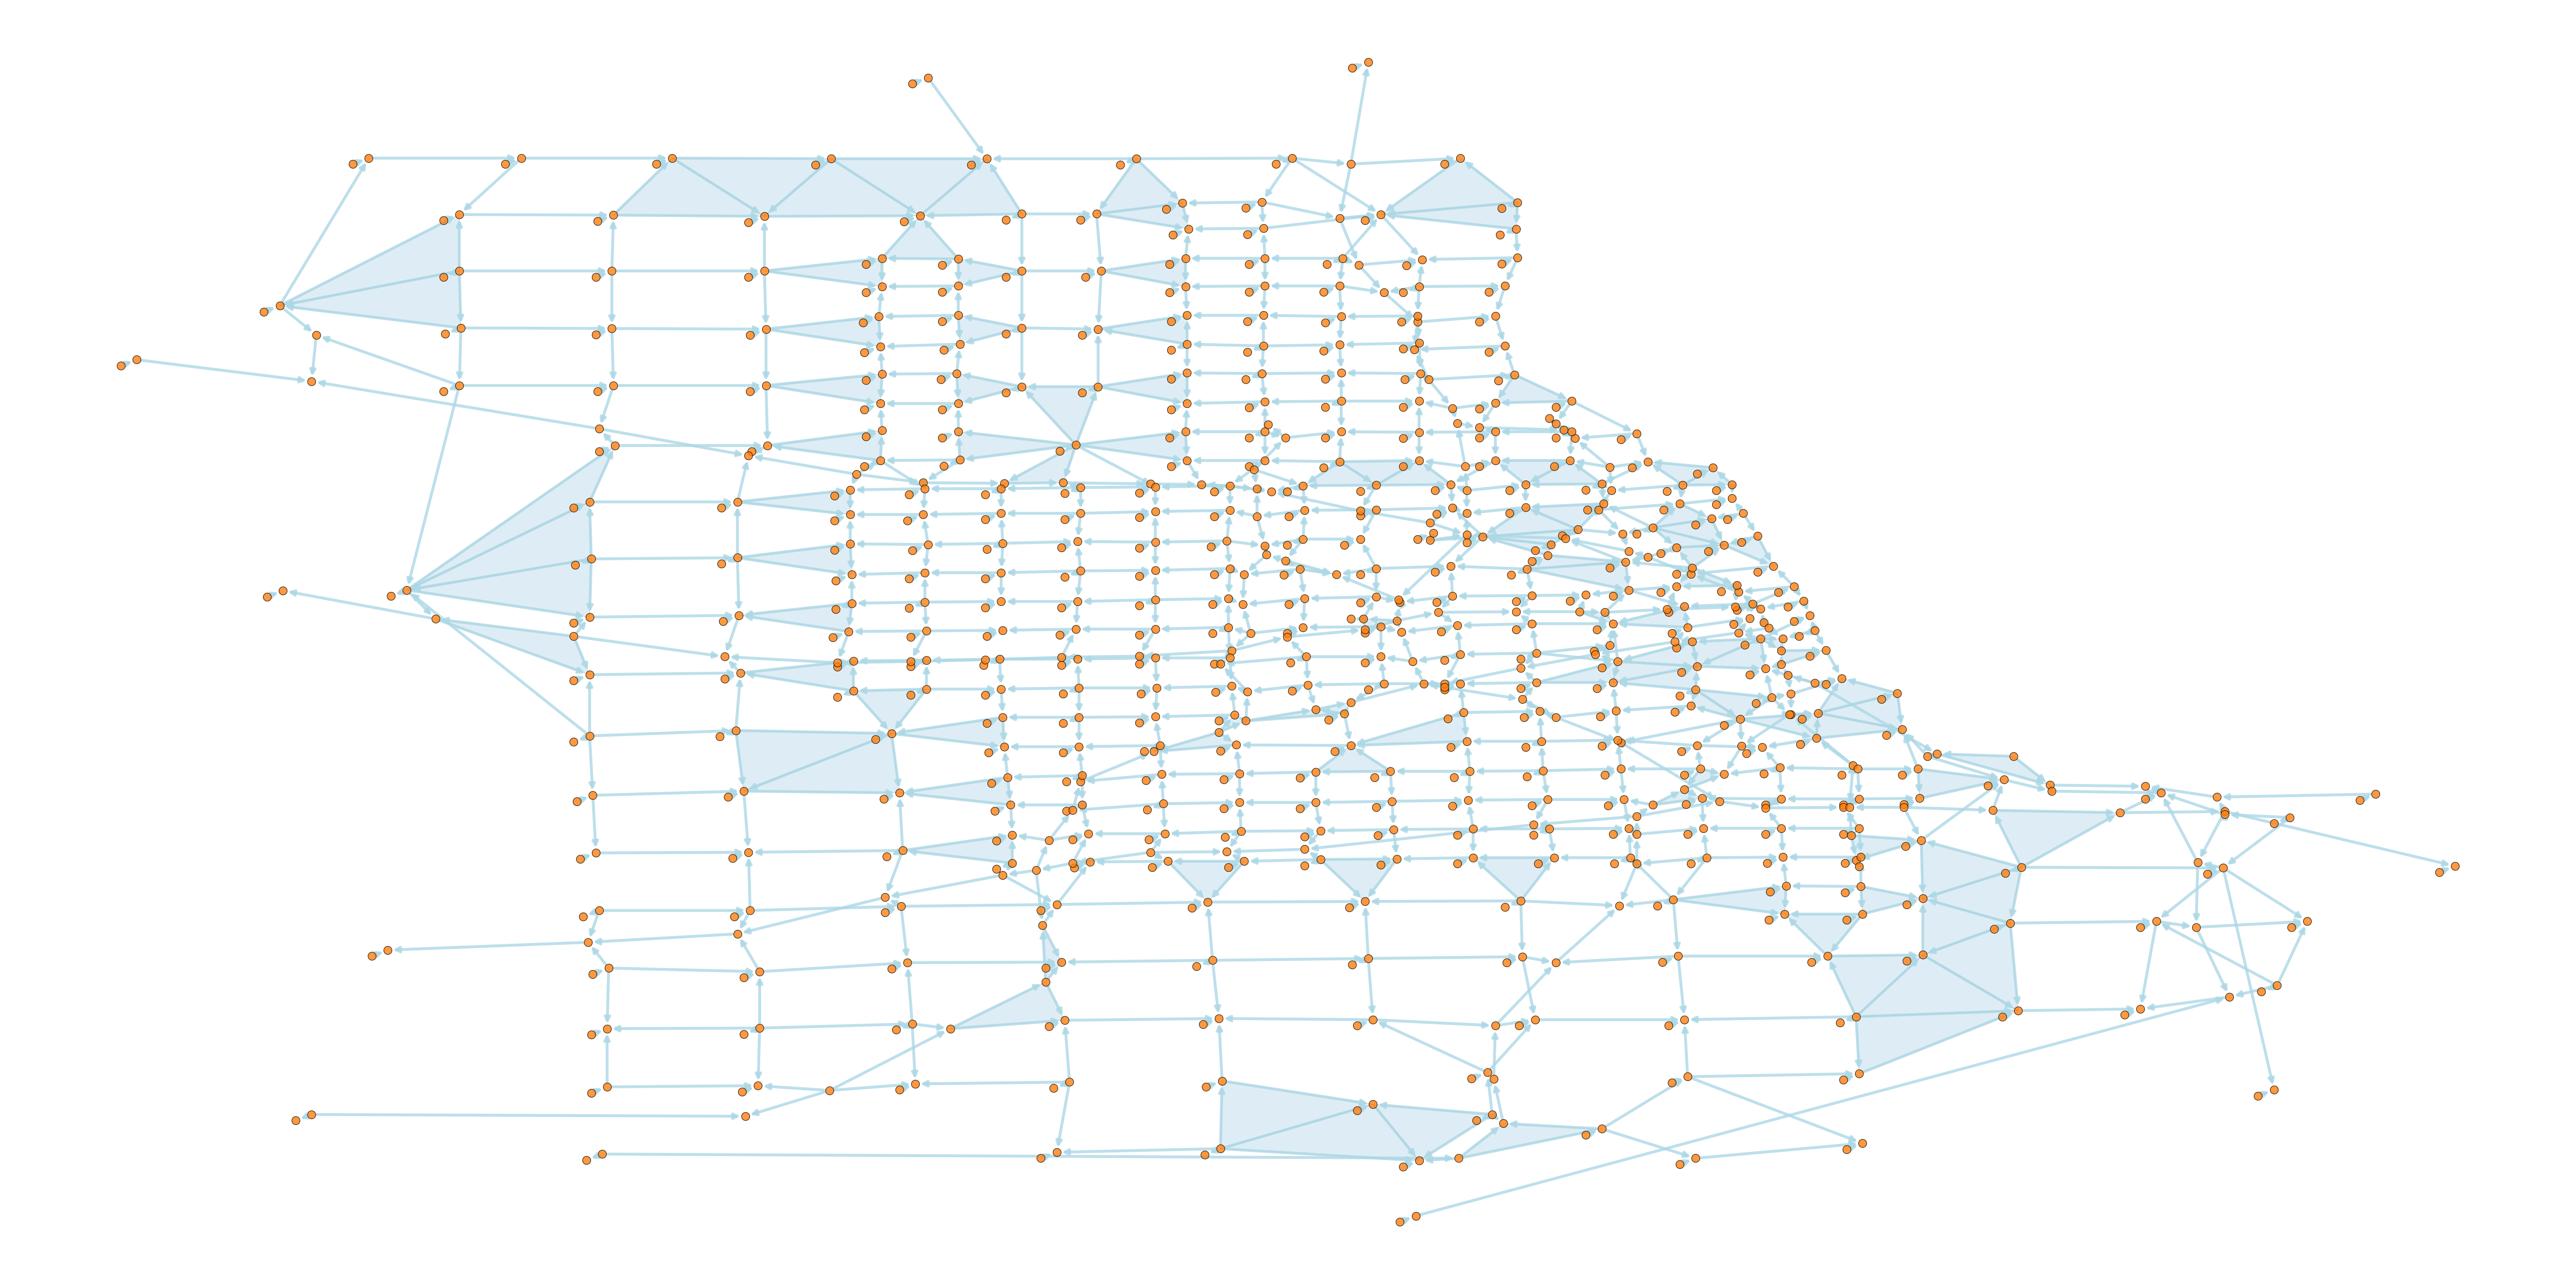

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(80, 40))
scplot.draw_network(with_labels=False, node_size=200, arrowsize=20, ax=ax)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


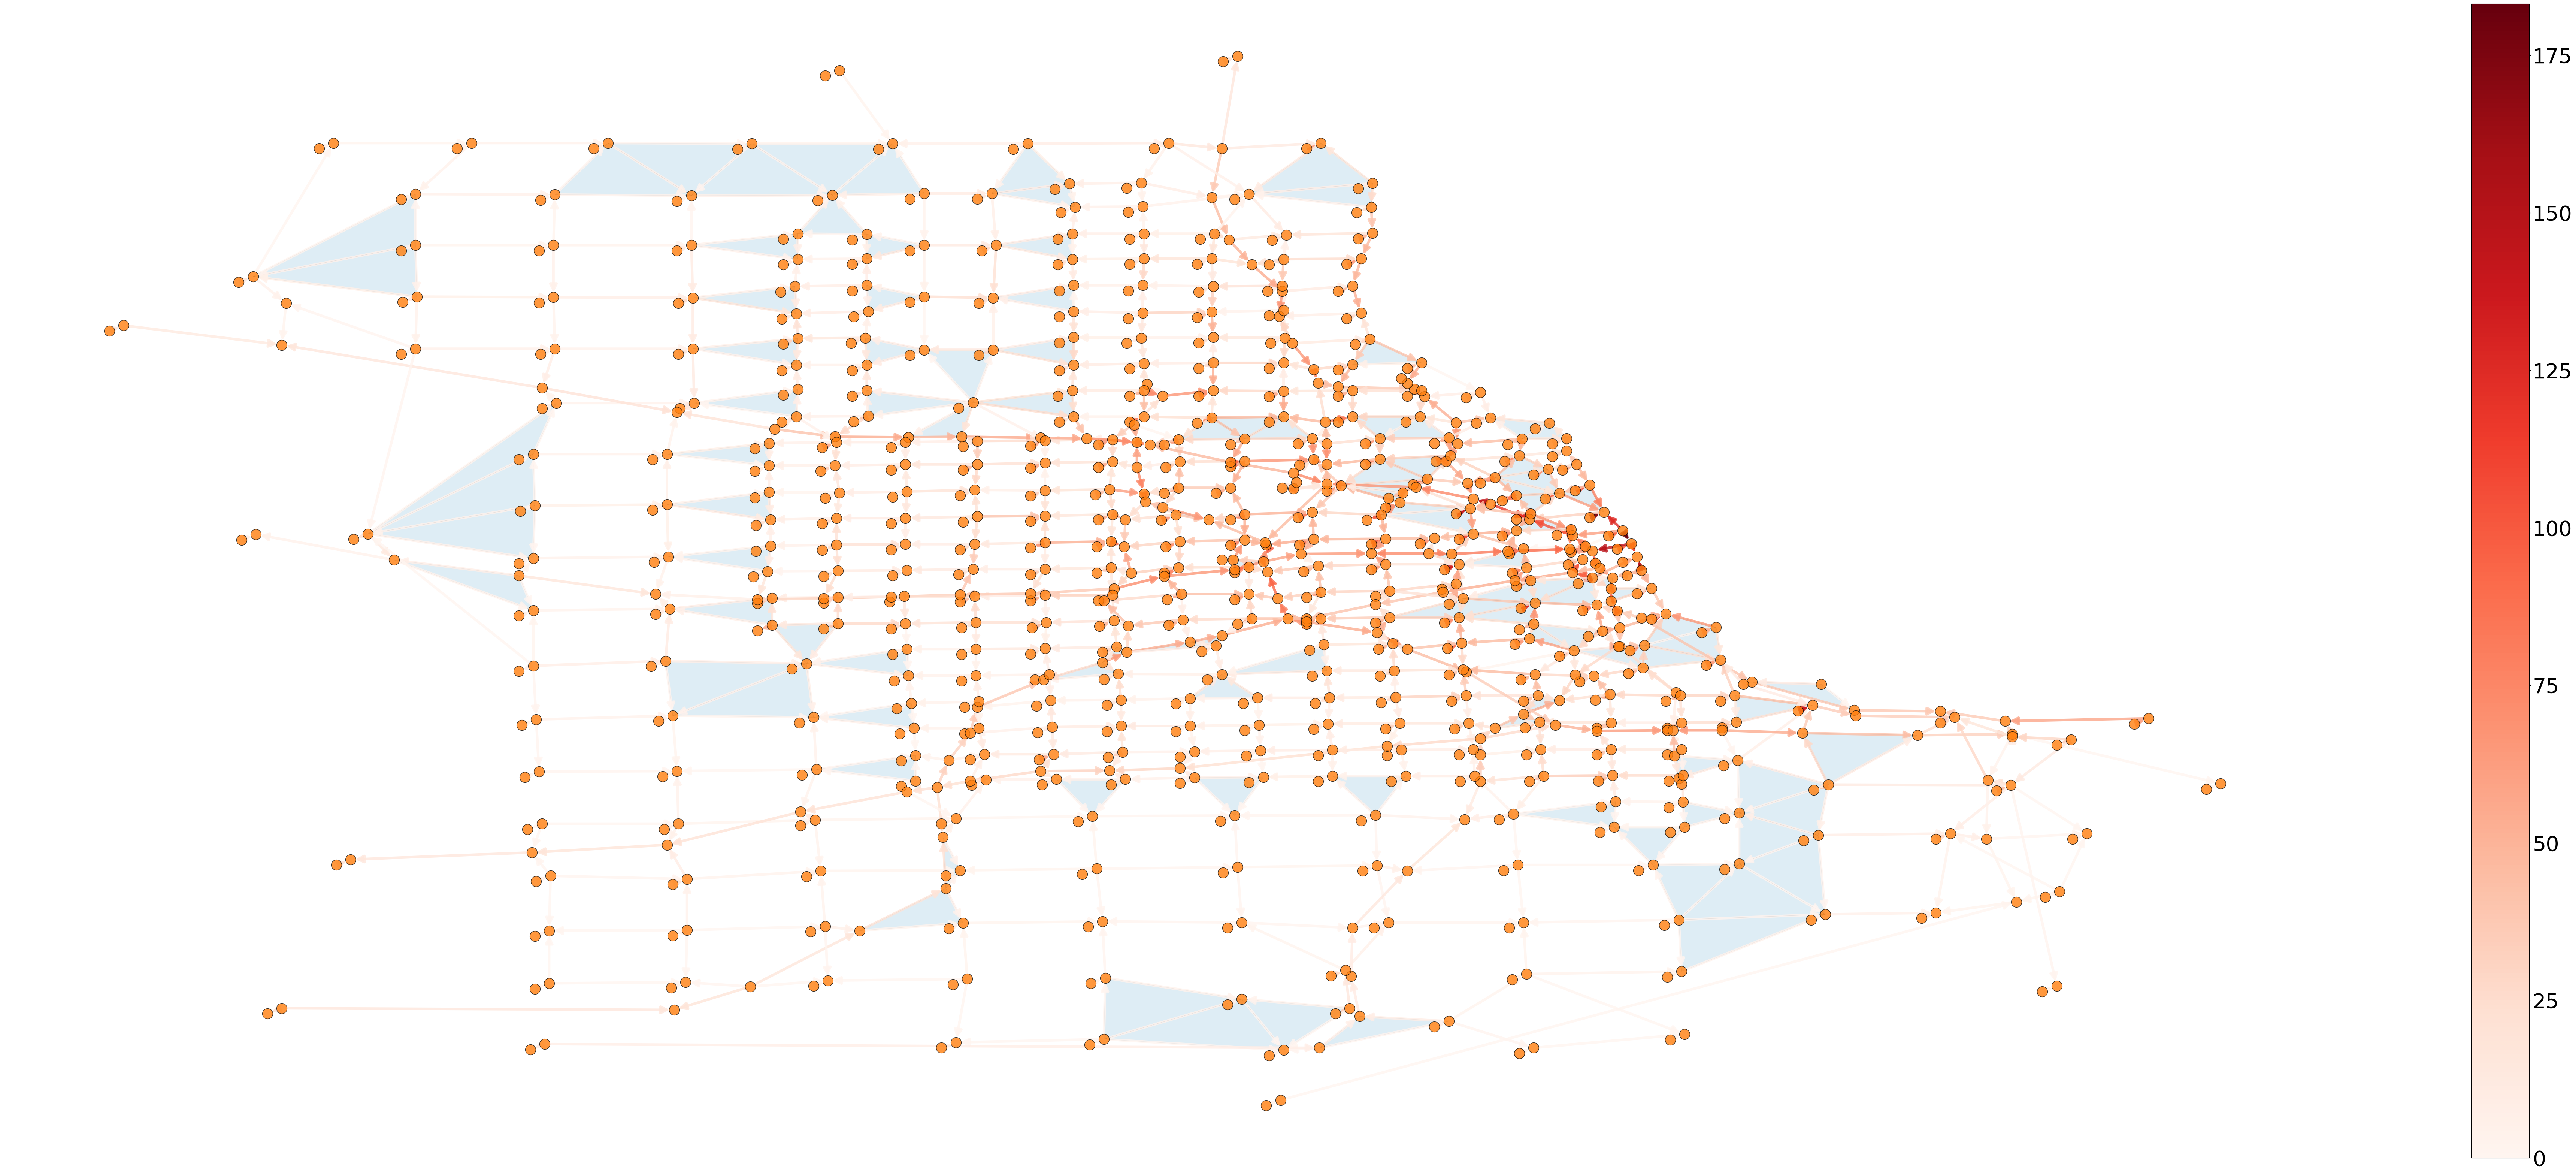

In [15]:
import numpy as np

flow_volume = np.round(np.array([*flow.values()]) * 0.01, 2)

fig, ax = plt.subplots(1, 1, figsize=(100, 40))
scplot.draw_network(edge_flow=flow_volume, with_labels=False, ax=ax)

## Filters

### Edge flow denoising

In [19]:
from sclibrary.filters import EdgeFlowDenoising

# denoising with lowe pass filter
efd = EdgeFlowDenoising(simplicial_complex=sc)
efd.denoise(p_choice="L1", component="gradient", f=flow_volume)

f_est_L1 = efd.history["f_estimated"]
print("Error", efd.calculate_error(f_est_L1, flow_volume))

Error 0.5231348553509848


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


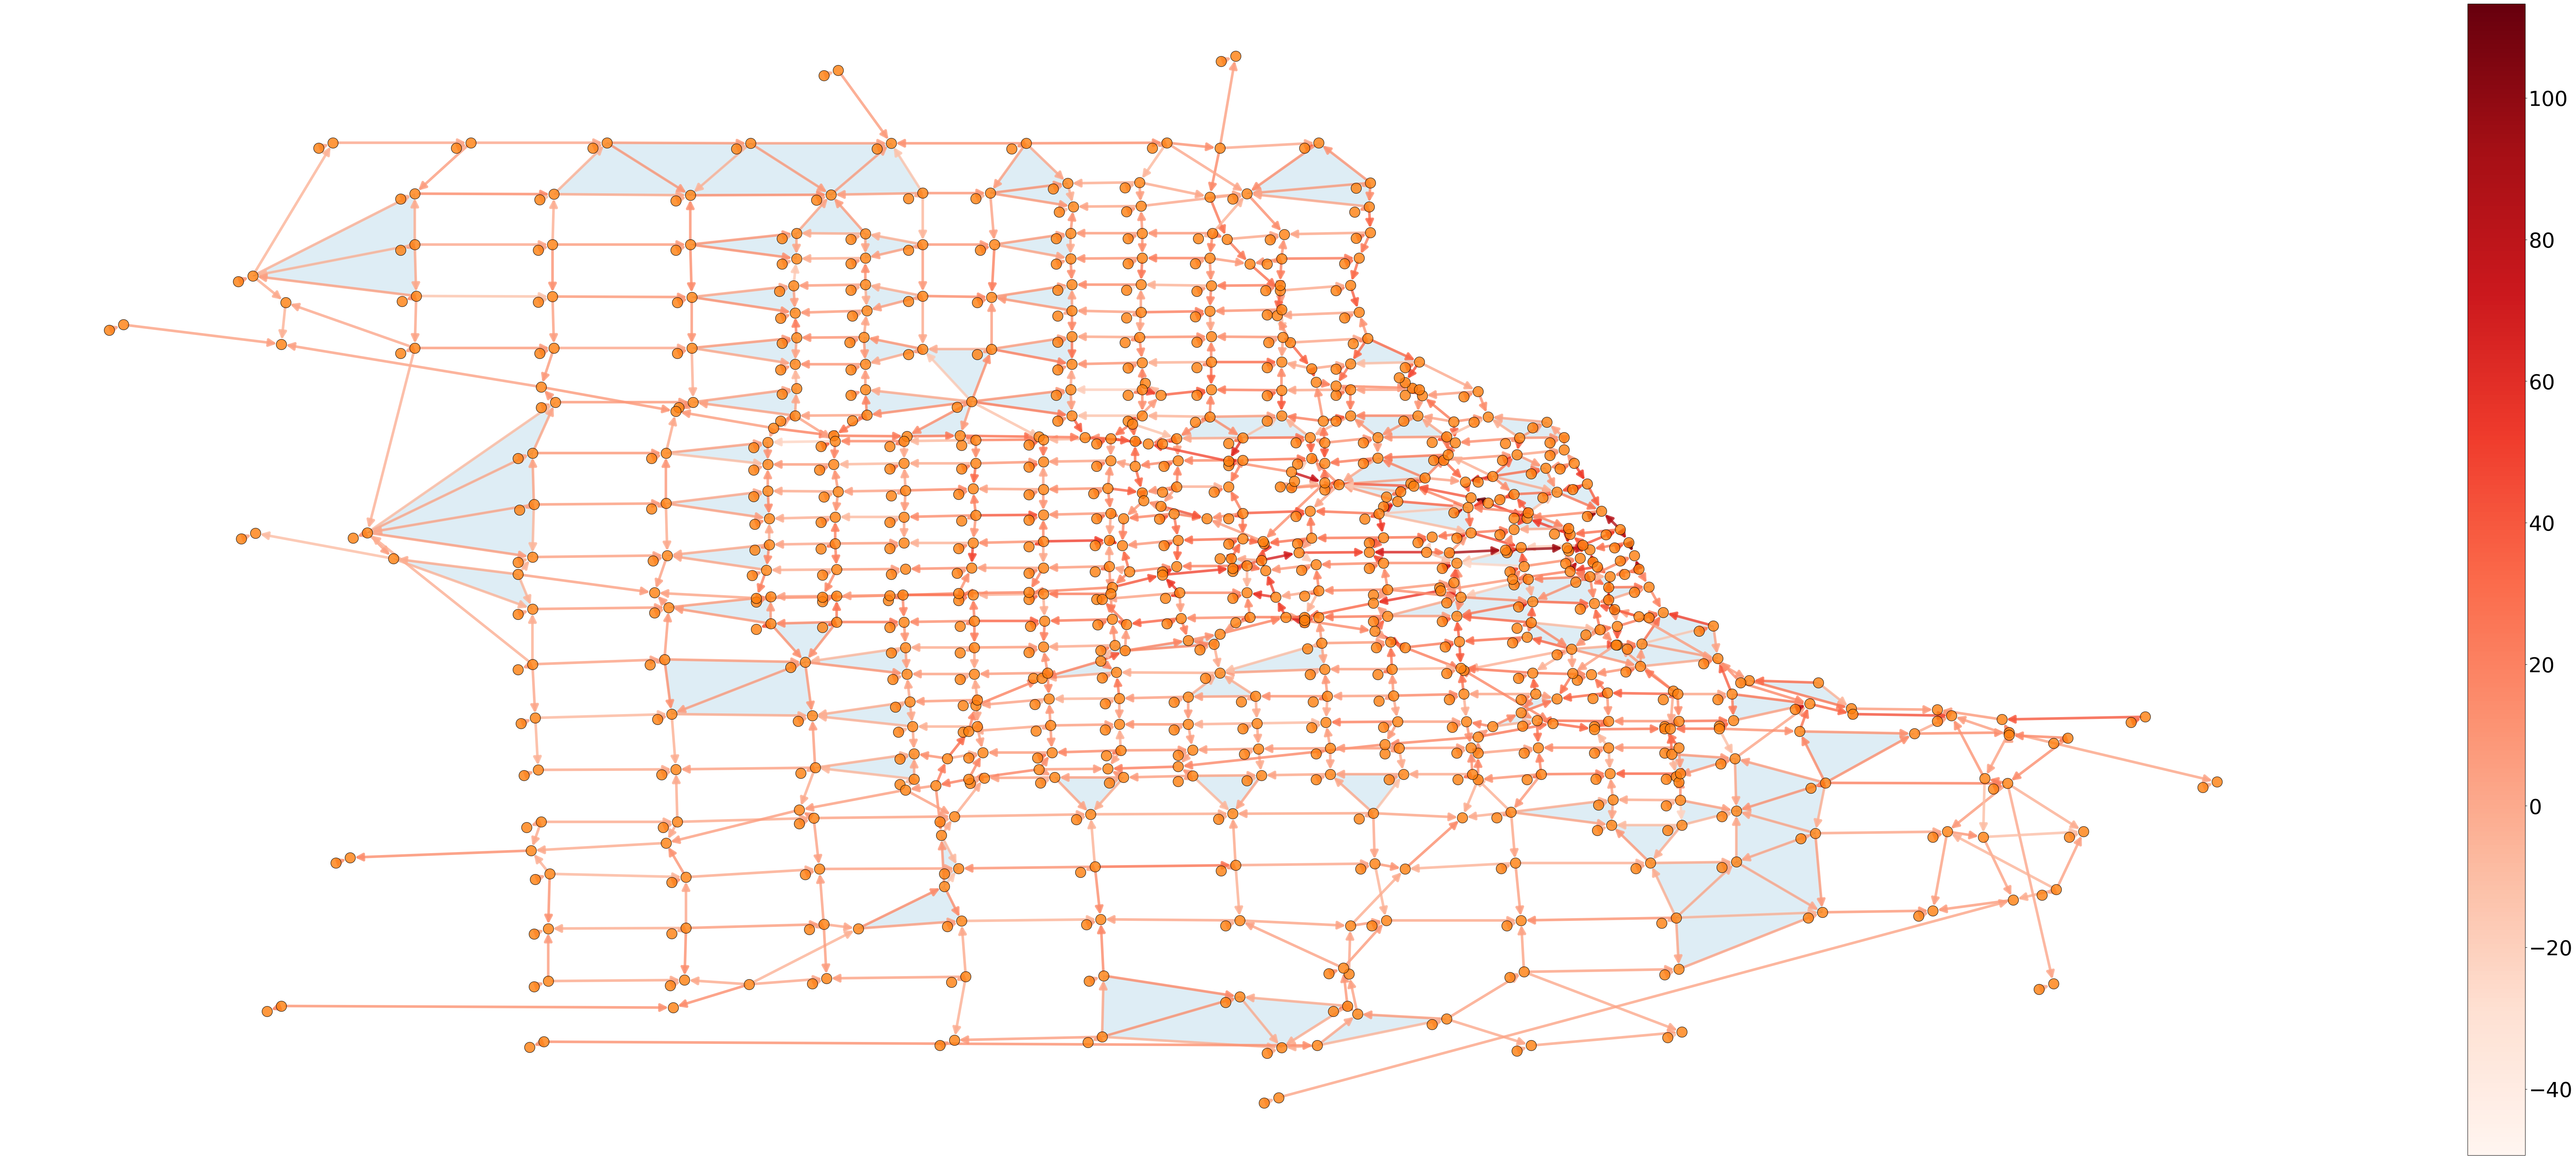

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(100, 40))
scplot.draw_network(edge_flow=np.round(f_est_L1, 2), with_labels=False, ax=ax)